In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, text
import networkx as nx

In [18]:
def buildAndExportGraph(shiftOperator, y, params):
    aux = pd.DataFrame(data=shiftOperator, columns=params)
    aux.index = params

    # Creates an empty graph
    G = nx.Graph()
    
    for i in range(aux.shape[0]):
        for j in range(aux.shape[0]):
            # Iteratively adds nodes
            G.add_edges_from([(params[i], params[j])], weight=aux.iloc[i, j])
            
    return G

def graphFunction(df, y, threshold_val):

    #################################################################
    print ("Size of the covariance matrix:", df.shape)
    print("Number of non-zero values before thresholding", np.count_nonzero(df))
    threshold = threshold_val
    s = df.copy()
    s[np.abs(s) < threshold] = 0
    print("Number of non-zero values after thresholding", np.count_nonzero(s))

    %matplotlib inline
    fig, ax = plt.subplots(1,1, figsize=(10,10))

    img = ax.imshow(s)

    x_label_list = df.keys().values
    ax.set_xticks(np.arange(0, len(x_label_list), 1), x_label_list)
    ax.set_yticks(np.arange(0, len(x_label_list), 1), x_label_list)

    ax.xaxis.set_tick_params(rotation=90)

    fig.colorbar(img)
    
    plt.savefig('./Grafos/weightMatrixByThreshold.pdf', format='pdf') 

    #################################################################
    keys = df.keys()
    # We build a graph and add as many nodes as we have variables.
    GDead = buildAndExportGraph(np.abs(s), y, keys)

    pos = nx.spring_layout(GDead, scale=0.1)
    
    # Obtain the attributes of the links in a networ
    edges, weights = zip(*nx.get_edge_attributes(GDead,'weight').items())

    options = {
        "edgelist": edges,
        "edge_color": weights,
        "width": np.array(weights) * 0.8,
        "alpha": 0.6,
    }


    return GDead, pos, options

In [19]:
folders = ["S1", "S2", "S3", "S4", "S5"]
dependencia = "DTW_D"
i = 0
x_train = pd.read_csv('../Step1_DTW/data_generated_by_dtw/' + dependencia + '/' + folders[i] + '/X_train.csv')
y_train = pd.read_csv('../df_to_load/DataToPaperAndTFM_Mod1/Subconjuntos_3D/' + folders[i] + '/y_train_tensor.csv')
x_train.shape

(842, 842)

In [20]:
max_pat = 24
x_train_aux = x_train.iloc[0:max_pat, 0:max_pat]
y_train_aux = y_train.iloc[0:max_pat]

print("No. ofMR patients in the first 30 patients:", np.sum(y_train_aux.MR == 1))
print("No. of non-MR patients in the first 30 patients", np.sum(y_train_aux.MR == 0))

Nº de pacientes MR en los 30 primeros pacientes: 15
Nº de pacientes no-MR en los 30 primeros pacientes: 9


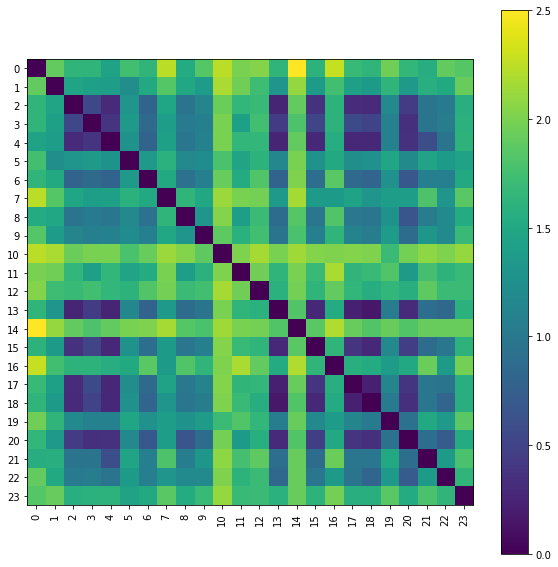

In [21]:
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(10,10))

img = ax.imshow(x_train_aux)

x_label_list = x_train_aux.keys().values
ax.set_xticks(np.arange(0, len(x_label_list), 1), x_label_list)
ax.set_yticks(np.arange(0, len(x_label_list), 1), x_label_list)

ax.xaxis.set_tick_params(rotation=90)

fig.colorbar(img)
plt.savefig('./Grafos/weightMatrix.pdf', format='pdf')  

Tamaño de la matriz de covarianza: (24, 24)
Número de valores no nulos antes de aplicar el threshold 552
Número de valores no nulos tras aplicar el threshold 98


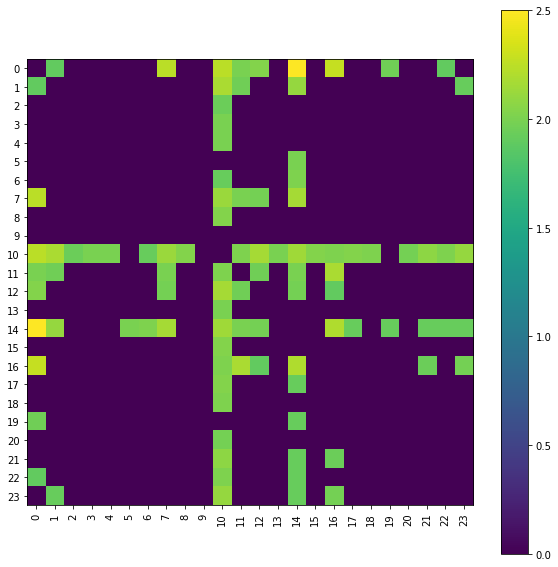

In [22]:
GDead, pos, options = graphFunction(x_train_aux, y_train_aux, threshold_val=1.9)

In [23]:
# Add nodes with label
labels = {}
for i in range(x_train_aux.shape[0]):
    labels[i] = str(y_train_aux.astype('int64').loc[i].MR)
                
for node, label in labels.items():
    if str(node) in GDead.nodes:
        GDead.nodes[str(node)]['label'] = label
    else:
        print(f"El nodo {node} no existe en el grafo.")
        
        
# Verify if the nodes have the attribute 'label'
for node in GDead.nodes:
    if 'label' in GDead.nodes[node]:
        print(f"Nodo {node} tiene etiqueta: {GDead.nodes[node]['label']}")
    else:
        print(f"Nodo {node} no tiene etiqueta")

# Map the labels to colors
label_color_mapping = {
    '0': 'green',
    '1': 'blue',
}

# Create a list of colors for the nodes based on the labels
node_colors = [label_color_mapping[GDead.nodes[node]['label']] for node in GDead.nodes]

Nodo 0 tiene etiqueta: 0
Nodo 1 tiene etiqueta: 0
Nodo 2 tiene etiqueta: 1
Nodo 3 tiene etiqueta: 1
Nodo 4 tiene etiqueta: 1
Nodo 5 tiene etiqueta: 0
Nodo 6 tiene etiqueta: 1
Nodo 7 tiene etiqueta: 0
Nodo 8 tiene etiqueta: 0
Nodo 9 tiene etiqueta: 0
Nodo 10 tiene etiqueta: 1
Nodo 11 tiene etiqueta: 1
Nodo 12 tiene etiqueta: 0
Nodo 13 tiene etiqueta: 1
Nodo 14 tiene etiqueta: 1
Nodo 15 tiene etiqueta: 1
Nodo 16 tiene etiqueta: 1
Nodo 17 tiene etiqueta: 1
Nodo 18 tiene etiqueta: 1
Nodo 19 tiene etiqueta: 0
Nodo 20 tiene etiqueta: 1
Nodo 21 tiene etiqueta: 1
Nodo 22 tiene etiqueta: 0
Nodo 23 tiene etiqueta: 1


In [24]:
# Identify and eliminate loops
selfloop_edges = list(nx.selfloop_edges(GDead))

for edge in selfloop_edges:
    GDead.remove_edge(edge[0], edge[1])


<IPython.core.display.Javascript object>


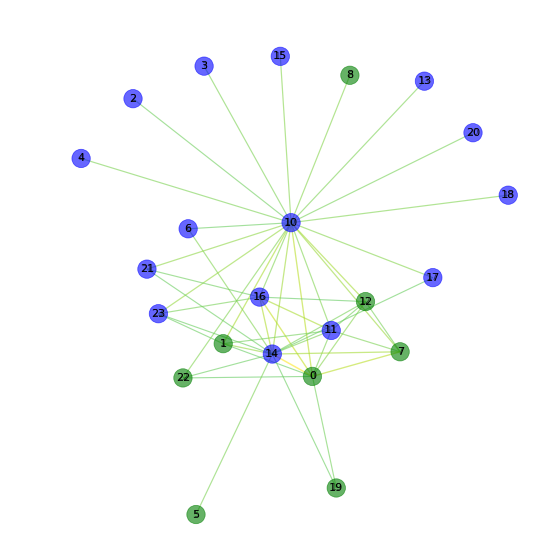

In [9]:
%matplotlib notebook
fig2, ax2 = plt.subplots(figsize=(10,10))
nx.draw(GDead, pos, ax=ax2, with_labels=True,node_size=600, node_color=node_colors, **options)

diffx = 0
diffy = 0
for node, (x, y) in pos.items():
    text((x + diffx), (y + diffy), node,  fontsize=15, ha='center', va='center')

plt.tight_layout()
#plt.savefig('./Grafos/graph2.pdf', format='pdf')  
# Green: non-AMR patients
# Blue: AMR patients

In [10]:
[10, 11, 21, 16, 6, 14, 23, 17]
[10, 22, 1,0, 7,12]

[10, 22, 1, 0, 7, 12]

In [25]:
i = 0
folders = ["S1"]
X = np.load('../df_to_load/DataToPaperAndTFM_Mod1/Subconjuntos_3D/' + folders[i] + '/X_train_tensor.npy')
print("No. of patients selected: ", X[0:max_pat].shape)

Admissiondboid_train = pd.read_csv("../df_to_load/DataToPaperAndTFM_Mod1/Subconjuntos_3D/" + folders[i] + "/Admissiondboid_train.csv")
df_adb = Admissiondboid_train.drop_duplicates().reset_index(drop=True)
df_adb['MR'] = y_train.MR
df_adb.Admissiondboid = df_adb.Admissiondboid.astype('str')
df_adb_aux = df_adb.iloc[0:max_pat]

df_MR = pd.read_csv("./dfTFMFinalv6.csv", low_memory=False)
df_MR.Admissiondboid = df_MR.Admissiondboid.astype('str')


columns = ['AMG', 'ATF', 'CAR', 'CF1', 'CF2', 'CF3',
       'CF4', 'Falta', 'GCC', 'GLI', 'LIN', 'LIP', 'MAC', 'MON', 'NTI', 'OTR',
       'OXA', 'PAP', 'PEN', 'POL', 'QUI', 'SUL', 'TTC', 'isVM',
       'numberOfPatients', 'numberOfPatientsMR', 'patientPAP', 'patientCAR',
       'patientFalta', 'patientQUI', 'patientATF', 'patientGLI', 'patientPEN',
       'patientCF3', 'patientCF4', 'patientOXA', 'patientNTI', 'patientLIN',
       'patientSUL', 'patientAMG', 'patientCF1', 'patientMAC', 'patientPOL',
       'patientMON', 'patientGCC', 'patientTTC', 'patientOTR', 'patientLIP',
       'patientCF2', 'inventedMask']

Nº de pacientes seleccionado:  (24, 7, 50)


In [29]:
pat_analize_arr = [10, 4,2,3,15,8,12,20,18]
atb = "CF3"

est = []
saps = []
age = []

for i in range(len(pat_analize_arr)):
    pat_analize = pat_analize_arr[i]
    print("====> PATIENT TO BE ANALIZED:", pat_analize)
    df_to_analize = pd.DataFrame(X[pat_analize], columns = columns)
    print("\tPatient MR(1) - no-MR (0):" , df_adb_aux.iloc[pat_analize].MR)
    print("\tHoursMV:", df_to_analize['isVM'].sum())
    print("\tNº co-patients MR:", df_to_analize['numberOfPatientsMR'].sum())
    print("\tNº days with CAR:", df_to_analize[atb].sum())
    print("\tNº of days until first culture or stay: ", np.sum(df_to_analize['inventedMask'] == 1.0))
    est.append(np.sum(df_to_analize['inventedMask'] == 1.0))
    saps.append(df_MR[df_MR.Admissiondboid == df_adb.iloc[pat_analize].Admissiondboid].SAPSIIIScore.unique()[0])
    age.append(df_MR[df_MR.Admissiondboid == df_adb.iloc[pat_analize].Admissiondboid].Age.unique()[0])
    print("\tAge: ", df_MR[df_MR.Admissiondboid == df_adb.iloc[pat_analize].Admissiondboid].Age.unique()[0])
    print("\tSAPSIIIScore: ", df_MR[df_MR.Admissiondboid == df_adb.iloc[pat_analize].Admissiondboid].SAPSIIIScore.unique()[0])
    print("\tDestination: ", df_MR[df_MR.Admissiondboid == df_adb.iloc[pat_analize].Admissiondboid].Destination.unique()[0])
    print()

====> PACIENTE A ANALIZAR: 10
	Paciente MR(1) - no-MR (0): 1.0
	HorasVM: 26.459400000000002
	Nº de co-pacientes MR: 4.0
	Nº de dias con CAR: 3.0
	Nº de dias hasta el primer cultivo o de estancia:  7
	Edad:  72.0
	SAPSIIIScore:  74.0
	Destination:  urology

====> PACIENTE A ANALIZAR: 4
	Paciente MR(1) - no-MR (0): 1.0
	HorasVM: 0.0
	Nº de co-pacientes MR: 1.0
	Nº de dias con CAR: 1.0
	Nº de dias hasta el primer cultivo o de estancia:  1
	Edad:  68.0
	SAPSIIIScore:  44.0
	Destination:  internal medicine

====> PACIENTE A ANALIZAR: 2
	Paciente MR(1) - no-MR (0): 1.0
	HorasVM: 3.2658
	Nº de co-pacientes MR: 1.0
	Nº de dias con CAR: 0.0
	Nº de dias hasta el primer cultivo o de estancia:  1
	Edad:  55.0
	SAPSIIIScore:  73.0
	Destination:  mortuary

====> PACIENTE A ANALIZAR: 3
	Paciente MR(1) - no-MR (0): 1.0
	HorasVM: 25.8833
	Nº de co-pacientes MR: 4.0
	Nº de dias con CAR: 0.0
	Nº de dias hasta el primer cultivo o de estancia:  2
	Edad:  58.0
	SAPSIIIScore:  43.0
	Destination:  traumatolog

In [28]:
np.mean(saps)

58.888888888888886

In [30]:
np.mean(age)

65.88888888888889

In [14]:
atbs = ['AMG', 'ATF', 'CAR', 'CF1', 'CF2', 'CF3',
       'CF4', 'Falta', 'GCC', 'GLI', 'LIN', 'LIP', 'MAC', 'MON', 'NTI', 'OTR',
       'OXA', 'PAP', 'PEN', 'POL', 'QUI', 'SUL', 'TTC']

arr = np.ones((24, len(atbs)))
for i in range(24):
    for j in range(len(atbs)):
        df_to_analize = pd.DataFrame(X[i], columns = columns)
        arr[i][j] = df_to_analize[atbs[j]].sum()
        
        
pd.set_option('display.max_columns', None)
df_atbs = pd.DataFrame(np.array(arr), columns=atbs)
np.sum(df_atbs, axis=1) > 4

0      True
1      True
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10     True
11     True
12     True
13    False
14     True
15    False
16     True
17    False
18    False
19     True
20    False
21     True
22     True
23    False
dtype: bool

In [15]:
pat_atbs = ['patientPAP', 'patientCAR',
       'patientFalta', 'patientQUI', 'patientATF', 'patientGLI', 'patientPEN',
       'patientCF3', 'patientCF4', 'patientOXA', 'patientNTI', 'patientLIN',
       'patientSUL', 'patientAMG', 'patientCF1', 'patientMAC', 'patientPOL',
       'patientMON', 'patientGCC', 'patientTTC', 'patientOTR', 'patientLIP',
       'patientCF2']

arr = np.ones((30, len(pat_atbs)))
for i in range(30):
    for j in range(len(pat_atbs)):
        df_to_analize = pd.DataFrame(X[i], columns = columns)
        arr[i][j] = df_to_analize[pat_atbs[j]].sum()
        
        
pd.set_option('display.max_columns', None)
df_pat_atbs = pd.DataFrame(np.array(arr), columns=pat_atbs)
np.sum(df_pat_atbs, axis=1) > 70

0      True
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10     True
11     True
12     True
13    False
14     True
15    False
16     True
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [16]:
import numpy as np

# Specifies the dimensions of the matrix
filas = 3
columnas = 4

# Creates an array of zeros of specified dimensions
matriz_de_ceros = np.zeros((filas, columnas))

print(matriz_de_ceros)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
